In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
pd.set_option('display.max_columns', None)

import warnings
warnings.filterwarnings("ignore")

from sklearn.model_selection import train_test_split
import lazypredict
from sklearn.ensemble import *
from sklearn.metrics import *
import lime.lime_tabular
from imblearn.over_sampling import SMOTE
from collections import Counter

In [2]:
df=pd.read_csv("dataset.csv",sep='|')
df.head()

,Name,md5,Machine,SizeOfOptionalHeader,Characteristics,MajorLinkerVersion,MinorLinkerVersion,SizeOfCode,SizeOfInitializedData,SizeOfUninitializedData,AddressOfEntryPoint,BaseOfCode,BaseOfData,ImageBase,SectionAlignment,FileAlignment,MajorOperatingSystemVersion,MinorOperatingSystemVersion,MajorImageVersion,MinorImageVersion,MajorSubsystemVersion,MinorSubsystemVersion,SizeOfImage,SizeOfHeaders,CheckSum,Subsystem,DllCharacteristics,SizeOfStackReserve,SizeOfStackCommit,SizeOfHeapReserve,SizeOfHeapCommit,LoaderFlags,NumberOfRvaAndSizes,SectionsNb,SectionsMeanEntropy,SectionsMinEntropy,SectionsMaxEntropy,SectionsMeanRawsize,SectionsMinRawsize,SectionMaxRawsize,SectionsMeanVirtualsize,SectionsMinVirtualsize,SectionMaxVirtualsize,ImportsNbDLL,ImportsNb,ImportsNbOrdinal,ExportNb,ResourcesNb,ResourcesMeanEntropy,ResourcesMinEntropy,ResourcesMaxEntropy,ResourcesMeanSize,ResourcesMinSize,ResourcesMaxSize,LoadConfigurationSize,VersionInformationSize,Target
0,memtest.exe,631ea355665f28d4707448e442fbf5b8,332,224,258,9,0,361984,115712,0,6135,4096,372736,4194304.0,4096,512,0,0,0,0,1,0,1036288,1024,485887,16,1024,1048576,4096,1048576,4096,0,16,8,5.766807,3.607430,7.221051,59712.0,1024,325120,126875.875,896,551848,0,0,0,0,4,3.262823,2.568844,3.537939,8797.000000,216,18032,0,16,1
1,ose.exe,9d10f99a6712e28f8acd5641e3a7ea6b,332,224,3330,9,0,130560,19968,0,81778,4096,143360,771751936.0,4096,512,5,1,0,0,5,1,159744,1024,188943,2,33088,1048576,4096,1048576,4096,0,16,4,4.839688,2.373525,6.566909,35584.0,2048,130560,37322.000,1840,130296,7,181,0,0,2,4.250461,3.420744,5.080177,837.000000,518,1156,72,18,1
2,setup.exe,4d92f518527353c0db88a70fddcfd390,332,224,3330,9,0,517120,621568,0,350896,4096,811008,771751936.0,4096,512,5,1,0,0,5,1,1150976,1024,1159817,2,32832,1048576,4096,1048576,4096,0,16,4,6.409558,4.885191,7.600957,273408.0,21504,517120,284498.000,21456,516760,14,235,21,1,11,4.426324,2.846449,5.271813,31102.272727,104,270376,72,18,1
3,DW20.EXE,a41e524f8d45f0074fd07805ff0c9b12,332,224,258,9,0,585728,369152,0,451258,4096,798720,771751936.0,4096,512,5,1,0,0,5,1,962560,1024,867570,2,33088,1048576,4096,1048576,4096,0,16,4,6.641731,5.642565,7.594929,207872.0,15360,585728,238502.000,15208,585488,15,360,6,1,10,4.364291,2.669314,6.400720,1457.000000,90,4264,72,18,1
4,dwtrig20.exe,c87e561258f2f8650cef999bf643a731,332,224,258,9,0,294912,247296,0,217381,4096,536576,771751936.0,4096,512,5,1,0,0,5,1,552960,1024,579287,2,33088,1048576,4096,1048576,4096,0,16,4,6.252684,4.182282,7.608305,128128.0,2560,294912,135350.000,2320,294816,10,194,4,1,2,4.306100,3.421598,5.190603,1074.500000,849,1300,72,18,1


In [3]:

print(df.shape[0])

138047


In [4]:
df.describe()

,Machine,SizeOfOptionalHeader,Characteristics,MajorLinkerVersion,MinorLinkerVersion,SizeOfCode,SizeOfInitializedData,SizeOfUninitializedData,AddressOfEntryPoint,BaseOfCode,BaseOfData,ImageBase,SectionAlignment,FileAlignment,MajorOperatingSystemVersion,MinorOperatingSystemVersion,MajorImageVersion,MinorImageVersion,MajorSubsystemVersion,MinorSubsystemVersion,SizeOfImage,SizeOfHeaders,CheckSum,Subsystem,DllCharacteristics,SizeOfStackReserve,SizeOfStackCommit,SizeOfHeapReserve,SizeOfHeapCommit,LoaderFlags,NumberOfRvaAndSizes,SectionsNb,SectionsMeanEntropy,SectionsMinEntropy,SectionsMaxEntropy,SectionsMeanRawsize,SectionsMinRawsize,SectionMaxRawsize,SectionsMeanVirtualsize,SectionsMinVirtualsize,SectionMaxVirtualsize,ImportsNbDLL,ImportsNb,ImportsNbOrdinal,ExportNb,ResourcesNb,ResourcesMeanEntropy,ResourcesMinEntropy,ResourcesMaxEntropy,ResourcesMeanSize,ResourcesMinSize,ResourcesMaxSize,LoadConfigurationSize,VersionInformationSize,Target
count,138047.000000,138047.000000,138047.000000,138047.000000,138047.000000,1.380470e+05,1.380470e+05,1.380470e+05,1.380470e+05,1.380470e+05,1.380470e+05,1.380470e+05,1.380470e+05,138047.000000,138047.000000,138047.000000,138047.000000,138047.000000,138047.000000,138047.000000,1.380470e+05,138047.000000,1.380470e+05,138047.000000,138047.000000,1.380470e+05,1.380470e+05,1.380470e+05,1.380470e+05,1.380470e+05,1.380470e+05,138047.000000,138047.000000,138047.000000,138047.000000,1.380470e+05,1.380470e+05,1.380470e+05,1.380470e+05,1.380470e+05,1.380470e+05,138047.000000,138047.000000,138047.000000,138047.000000,138047.000000,138047.000000,138047.000000,138047.000000,1.380470e+05,1.380470e+05,1.380470e+05,1.380470e+05,138047.000000,138047.000000
mean,4259.069274,225.845632,4444.145994,8.619774,3.819286,2.425956e+05,4.504867e+05,1.009525e+05,1.719561e+05,5.779845e+04,2.213743e+05,5.350876e+14,7.323764e+03,694.386694,5.097843,1.092983,68.751983,64.851283,4.861895,1.444602,8.159750e+05,1297.876520,1.797959e+08,2.157403,22312.125283,9.302477e+05,5.445543e+03,1.031958e+06,3.429882e+04,3.608506e+04,7.908762e+04,4.994509,4.637599,2.259625,6.958913,1.871513e+05,1.956488e+04,6.506805e+05,1.884237e+05,2.109837e+04,6.349808e+05,5.462937,113.225648,4.338341,23.674263,22.050700,4.000127,2.434541,5.521610,5.545093e+04,1.818082e+04,2.465903e+05,4.656750e+05,12.363115,0.299340
std,10880.347245,5.121399,8186.782524,4.088757,11.862675,5.754485e+06,2.101599e+07,1.635288e+07,3.430553e+06,5.527658e+06,2.188020e+06,9.929589e+16,6.257687e+05,1289.921098,99.220192,77.551077,1185.886042,1139.691397,0.647720,181.180393,6.530065e+06,5595.523021,5.976192e+08,0.452940,15440.574817,5.550081e+05,1.804724e+04,1.817744e+05,7.906877e+06,8.904748e+06,1.466901e+07,1.915329,1.099464,1.831893,1.044297,7.735218e+06,3.540868e+05,3.007226e+07,4.180153e+06,3.543141e+05,1.285463e+07,4.362811,123.134704,34.776745,252.093958,136.494244,1.112981,0.815577,1.597403,7.799163e+06,6.502369e+06,2.124860e+07,2.608987e+07,6.798878,0.457971
min,332.000000,224.000000,2.000000,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,6.553600e+04,1.600000e+01,16.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000e+00,448.000000,0.000000e+00,1.000000,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,7.000000e+00,1.000000,0.000000,0.000000,0.000000,6.400000e+01,0.000000e+00,6.400000e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000
25%,332.000000,224.000000,258.000000,8.000000,0.000000,3.020800e+04,2.457600e+04,0.000000e+00,1.272100e+04,4.096000e+03,2.867200e+04,4.194304e+06,4.096000e+03,512.000000,4.000000,0.000000,0.000000,0.000000,4.000000,0.000000,1.843200e+05,1024.000000,1.065765e+05,2.000000,320.000000,1.048576e+06,4.096000e+03,1.048576e+06,4.096000e+03,0.000000e+00,1.600000e+01,4.000000,4.001088,0.020393,6.417698,1.868800e+04,5.120000e+02,5.7

In [5]:
df.isnull().sum()

Name                           0
md5                            0
Machine                        0
SizeOfOptionalHeader           0
Characteristics                0
MajorLinkerVersion             0
MinorLinkerVersion             0
SizeOfCode                     0
SizeOfInitializedData          0
SizeOfUninitializedData        0
AddressOfEntryPoint            0
BaseOfCode                     0
BaseOfData                     0
ImageBase                      0
SectionAlignment               0
FileAlignment                  0
MajorOperatingSystemVersion    0
MinorOperatingSystemVersion    0
MajorImageVersion              0
MinorImageVersion              0
MajorSubsystemVersion          0
MinorSubsystemVersion          0
SizeOfImage                    0
SizeOfHeaders                  0
CheckSum                       0
Subsystem                      0
DllCharacteristics             0
SizeOfStackReserve             0
SizeOfStackCommit              0
SizeOfHeapReserve              0
SizeOfHeap

In [6]:
df.Target.value_counts() 

0    96724
1    41323
Name: Target, dtype: int64

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 138047 entries, 0 to 138046
Data columns (total 57 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   Name                         138047 non-null  object 
 1   md5                          138047 non-null  object 
 2   Machine                      138047 non-null  int64  
 3   SizeOfOptionalHeader         138047 non-null  int64  
 4   Characteristics              138047 non-null  int64  
 5   MajorLinkerVersion           138047 non-null  int64  
 6   MinorLinkerVersion           138047 non-null  int64  
 7   SizeOfCode                   138047 non-null  int64  
 8   SizeOfInitializedData        138047 non-null  int64  
 9   SizeOfUninitializedData      138047 non-null  int64  
 10  AddressOfEntryPoint          138047 non-null  int64  
 11  BaseOfCode                   138047 non-null  int64  
 12  BaseOfData                   138047 non-null  int64  
 13 

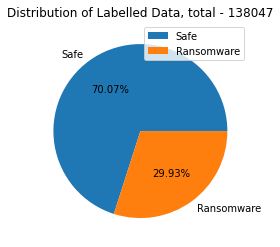

In [8]:
plt.pie(df.Target.value_counts().values.tolist(), labels=['Safe','Ransomware'], autopct='%.2f%%')
plt.legend()
plt.title(f"Distribution of Labelled Data, total - {len(df)}")
plt.show()

In [9]:
df.head()

,Name,md5,Machine,SizeOfOptionalHeader,Characteristics,MajorLinkerVersion,MinorLinkerVersion,SizeOfCode,SizeOfInitializedData,SizeOfUninitializedData,AddressOfEntryPoint,BaseOfCode,BaseOfData,ImageBase,SectionAlignment,FileAlignment,MajorOperatingSystemVersion,MinorOperatingSystemVersion,MajorImageVersion,MinorImageVersion,MajorSubsystemVersion,MinorSubsystemVersion,SizeOfImage,SizeOfHeaders,CheckSum,Subsystem,DllCharacteristics,SizeOfStackReserve,SizeOfStackCommit,SizeOfHeapReserve,SizeOfHeapCommit,LoaderFlags,NumberOfRvaAndSizes,SectionsNb,SectionsMeanEntropy,SectionsMinEntropy,SectionsMaxEntropy,SectionsMeanRawsize,SectionsMinRawsize,SectionMaxRawsize,SectionsMeanVirtualsize,SectionsMinVirtualsize,SectionMaxVirtualsize,ImportsNbDLL,ImportsNb,ImportsNbOrdinal,ExportNb,ResourcesNb,ResourcesMeanEntropy,ResourcesMinEntropy,ResourcesMaxEntropy,ResourcesMeanSize,ResourcesMinSize,ResourcesMaxSize,LoadConfigurationSize,VersionInformationSize,Target
0,memtest.exe,631ea355665f28d4707448e442fbf5b8,332,224,258,9,0,361984,115712,0,6135,4096,372736,4194304.0,4096,512,0,0,0,0,1,0,1036288,1024,485887,16,1024,1048576,4096,1048576,4096,0,16,8,5.766807,3.607430,7.221051,59712.0,1024,325120,126875.875,896,551848,0,0,0,0,4,3.262823,2.568844,3.537939,8797.000000,216,18032,0,16,1
1,ose.exe,9d10f99a6712e28f8acd5641e3a7ea6b,332,224,3330,9,0,130560,19968,0,81778,4096,143360,771751936.0,4096,512,5,1,0,0,5,1,159744,1024,188943,2,33088,1048576,4096,1048576,4096,0,16,4,4.839688,2.373525,6.566909,35584.0,2048,130560,37322.000,1840,130296,7,181,0,0,2,4.250461,3.420744,5.080177,837.000000,518,1156,72,18,1
2,setup.exe,4d92f518527353c0db88a70fddcfd390,332,224,3330,9,0,517120,621568,0,350896,4096,811008,771751936.0,4096,512,5,1,0,0,5,1,1150976,1024,1159817,2,32832,1048576,4096,1048576,4096,0,16,4,6.409558,4.885191,7.600957,273408.0,21504,517120,284498.000,21456,516760,14,235,21,1,11,4.426324,2.846449,5.271813,31102.272727,104,270376,72,18,1
3,DW20.EXE,a41e524f8d45f0074fd07805ff0c9b12,332,224,258,9,0,585728,369152,0,451258,4096,798720,771751936.0,4096,512,5,1,0,0,5,1,962560,1024,867570,2,33088,1048576,4096,1048576,4096,0,16,4,6.641731,5.642565,7.594929,207872.0,15360,585728,238502.000,15208,585488,15,360,6,1,10,4.364291,2.669314,6.400720,1457.000000,90,4264,72,18,1
4,dwtrig20.exe,c87e561258f2f8650cef999bf643a731,332,224,258,9,0,294912,247296,0,217381,4096,536576,771751936.0,4096,512,5,1,0,0,5,1,552960,1024,579287,2,33088,1048576,4096,1048576,4096,0,16,4,6.252684,4.182282,7.608305,128128.0,2560,294912,135350.000,2320,294816,10,194,4,1,2,4.306100,3.421598,5.190603,1074.500000,849,1300,72,18,1


In [10]:
df.md5.nunique()

138047

In [11]:
df.md5.isnull().sum()

0

In [12]:
df.head()

,Name,md5,Machine,SizeOfOptionalHeader,Characteristics,MajorLinkerVersion,MinorLinkerVersion,SizeOfCode,SizeOfInitializedData,SizeOfUninitializedData,AddressOfEntryPoint,BaseOfCode,BaseOfData,ImageBase,SectionAlignment,FileAlignment,MajorOperatingSystemVersion,MinorOperatingSystemVersion,MajorImageVersion,MinorImageVersion,MajorSubsystemVersion,MinorSubsystemVersion,SizeOfImage,SizeOfHeaders,CheckSum,Subsystem,DllCharacteristics,SizeOfStackReserve,SizeOfStackCommit,SizeOfHeapReserve,SizeOfHeapCommit,LoaderFlags,NumberOfRvaAndSizes,SectionsNb,SectionsMeanEntropy,SectionsMinEntropy,SectionsMaxEntropy,SectionsMeanRawsize,SectionsMinRawsize,SectionMaxRawsize,SectionsMeanVirtualsize,SectionsMinVirtualsize,SectionMaxVirtualsize,ImportsNbDLL,ImportsNb,ImportsNbOrdinal,ExportNb,ResourcesNb,ResourcesMeanEntropy,ResourcesMinEntropy,ResourcesMaxEntropy,ResourcesMeanSize,ResourcesMinSize,ResourcesMaxSize,LoadConfigurationSize,VersionInformationSize,Target
0,memtest.exe,631ea355665f28d4707448e442fbf5b8,332,224,258,9,0,361984,115712,0,6135,4096,372736,4194304.0,4096,512,0,0,0,0,1,0,1036288,1024,485887,16,1024,1048576,4096,1048576,4096,0,16,8,5.766807,3.607430,7.221051,59712.0,1024,325120,126875.875,896,551848,0,0,0,0,4,3.262823,2.568844,3.537939,8797.000000,216,18032,0,16,1
1,ose.exe,9d10f99a6712e28f8acd5641e3a7ea6b,332,224,3330,9,0,130560,19968,0,81778,4096,143360,771751936.0,4096,512,5,1,0,0,5,1,159744,1024,188943,2,33088,1048576,4096,1048576,4096,0,16,4,4.839688,2.373525,6.566909,35584.0,2048,130560,37322.000,1840,130296,7,181,0,0,2,4.250461,3.420744,5.080177,837.000000,518,1156,72,18,1
2,setup.exe,4d92f518527353c0db88a70fddcfd390,332,224,3330,9,0,517120,621568,0,350896,4096,811008,771751936.0,4096,512,5,1,0,0,5,1,1150976,1024,1159817,2,32832,1048576,4096,1048576,4096,0,16,4,6.409558,4.885191,7.600957,273408.0,21504,517120,284498.000,21456,516760,14,235,21,1,11,4.426324,2.846449,5.271813,31102.272727,104,270376,72,18,1
3,DW20.EXE,a41e524f8d45f0074fd07805ff0c9b12,332,224,258,9,0,585728,369152,0,451258,4096,798720,771751936.0,4096,512,5,1,0,0,5,1,962560,1024,867570,2,33088,1048576,4096,1048576,4096,0,16,4,6.641731,5.642565,7.594929,207872.0,15360,585728,238502.000,15208,585488,15,360,6,1,10,4.364291,2.669314,6.400720,1457.000000,90,4264,72,18,1
4,dwtrig20.exe,c87e561258f2f8650cef999bf643a731,332,224,258,9,0,294912,247296,0,217381,4096,536576,771751936.0,4096,512,5,1,0,0,5,1,552960,1024,579287,2,33088,1048576,4096,1048576,4096,0,16,4,6.252684,4.182282,7.608305,128128.0,2560,294912,135350.000,2320,294816,10,194,4,1,2,4.306100,3.421598,5.190603,1074.500000,849,1300,72,18,1


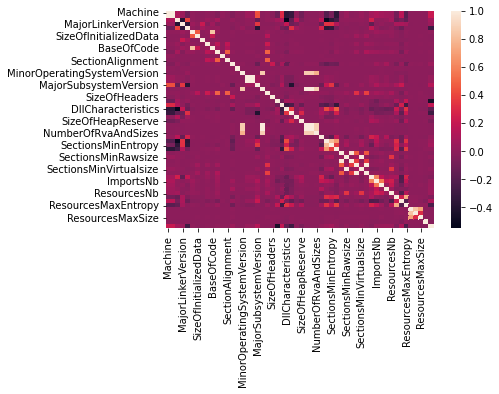

In [13]:

sns.heatmap(df.drop(['Name','md5','Target'], axis=1).corr())
plt.show()

In [14]:

corr_matrix = df.drop(['Name','md5','Target'], axis=1).corr().abs() 


upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool))


to_drop = [column for column in upper.columns if any(upper[column] > 0.95)]

print(to_drop)

['SizeOfOptionalHeader', 'MinorImageVersion', 'SizeOfHeapCommit', 'LoaderFlags', 'SectionMaxRawsize', 'SectionsMinVirtualsize', 'SectionMaxVirtualsize']


In [15]:

df.drop(to_drop, axis=1, inplace=True)

<AxesSubplot:>

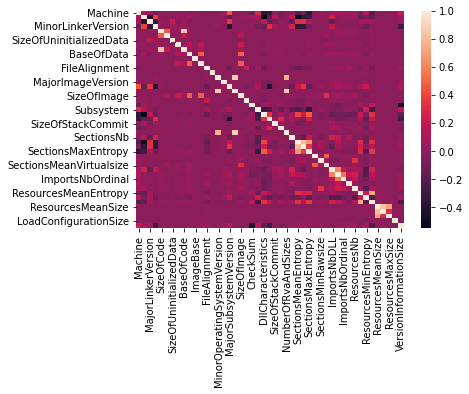

In [16]:
sns.heatmap(df.drop(['Name','md5','Target'], axis=1).corr())

In [17]:
#feature selection
def relief(data, target, bins=10, show_woe=False):
    newDF,woeDF = pd.DataFrame(), pd.DataFrame()
    
    cols = data.columns
    
    for ivars in cols[~cols.isin([target])]:
        if (data[ivars].dtype.kind in 'bifc') and (len(np.unique(data[ivars]))>10):
            binned_x = pd.qcut(data[ivars], bins,  duplicates='drop')
            d0 = pd.DataFrame({'x': binned_x, 'y': data[target]})
        else:
            d0 = pd.DataFrame({'x': data[ivars], 'y': data[target]})
        d = d0.groupby("x", as_index=False).agg({"y": ["count", "sum"]})
        d.columns = ['Cutoff', 'N', 'Events']
        d['% of Events'] = np.maximum(d['Events'], 0.5) / d['Events'].sum()
        d['Non-Events'] = d['N'] - d['Events']
        d['% of Non-Events'] = np.maximum(d['Non-Events'], 0.5) / d['Non-Events'].sum()
        d['WoE'] = np.log(d['% of Events']/d['% of Non-Events'])
        d['IV'] = d['WoE'] * (d['% of Events'] - d['% of Non-Events'])
        d.insert(loc=0, column='Variable', value=ivars)
        print("Information value of " + ivars + " is " + str(round(d['IV'].sum(),6)))
        temp =pd.DataFrame({"Variable" : [ivars], "IV" : [d['IV'].sum()]}, columns = ["Variable", "IV"])
        newDF=pd.concat([newDF,temp], axis=0)
        woeDF=pd.concat([woeDF,d], axis=0)

        if show_woe == True:
            print(d)
    return newDF, woeDF

In [18]:
df.Target.dtypes

dtype('int64')

In [19]:
iv, woe = relief(df.drop(['Name','md5'],axis=1), 'Target')

Information value of Machine is 2.596527
Information value of Characteristics is 3.823743
Information value of MajorLinkerVersion is 2.787002
Information value of MinorLinkerVersion is 0.583745
Information value of SizeOfCode is 2.5136
Information value of SizeOfInitializedData is 3.569039
Information value of SizeOfUninitializedData is 0.328101
Information value of AddressOfEntryPoint is 2.351206
Information value of BaseOfCode is 0.031301
Information value of BaseOfData is 2.974971
Information value of ImageBase is 6.097249
Information value of SectionAlignment is 0.163236
Information value of FileAlignment is 0.153303
Information value of MajorOperatingSystemVersion is 4.34342
Information value of MinorOperatingSystemVersion is 0.475603
Information value of MajorImageVersion is 0.181241
Information value of MajorSubsystemVersion is 3.566766
Information value of MinorSubsystemVersion is 0.872094
Information value of SizeOfImage is 2.965568
Information value of SizeOfHeaders is 0.1176

In [20]:
iv.sort_values(by = 'IV', ascending=False)

,Variable,IV
0,ImageBase,6.097249
0,VersionInformationSize,5.187680
0,SectionsMaxEntropy,4.978054
0,MajorOperatingSystemVersion,4.343420
0,ResourcesMinSize,4.272744
0,SizeOfStackReserve,4.161116
0,Characteristics,3.823743
0,SizeOfInitializedData,3.569039
0,MajorSubsystemVersion,3.566766
0,ResourcesNb,3.088450


In [21]:
thresh = 1
res = len(iv)-len(iv[iv['IV']>thresh]) 
print(res) 

14


In [22]:
features = iv.sort_values(by = 'IV', ascending=False)['Variable'][:res].values.tolist()

In [23]:
print(features,'\n')
print('Total number of features-\n',len(features))

['ImageBase', 'VersionInformationSize', 'SectionsMaxEntropy', 'MajorOperatingSystemVersion', 'ResourcesMinSize', 'SizeOfStackReserve', 'Characteristics', 'SizeOfInitializedData', 'MajorSubsystemVersion', 'ResourcesNb', 'Subsystem', 'ResourcesMinEntropy', 'BaseOfData', 'SizeOfImage'] 

Total number of features-
 14


In [24]:
X = df[features]
y = df['Target']

In [25]:
randomseed = 42
ac=[]

In [26]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, random_state=randomseed)

In [27]:
#existing decision tree 
from sklearn import tree
model=tree.DecisionTreeClassifier()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
ac.append(accuracy_score(y_pred,y_test)*100)
accuracy_score(y_pred,y_test)

0.9908004346251358

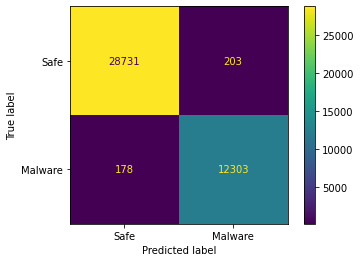

In [28]:
cm = confusion_matrix(y_test,y_pred)
classes = ['Safe', 'Malware']

cmd = ConfusionMatrixDisplay(cm, display_labels=classes)
cmd.plot()
plt.show()

In [29]:
#random forest
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier(max_depth=2, random_state=0)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
ac.append(accuracy_score(y_pred,y_test)*100)
accuracy_score(y_pred,y_test)

0.9831220572256428

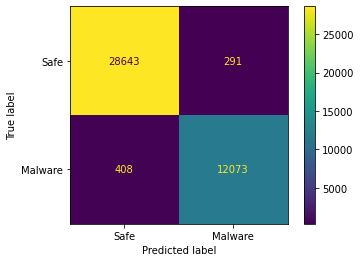

In [30]:
cm = confusion_matrix(y_test,y_pred)
classes = ['Safe', 'Malware']

cmd = ConfusionMatrixDisplay(cm, display_labels=classes)
cmd.plot()
plt.show()

In [31]:
#Extreme tree
from sklearn.ensemble import ExtraTreesClassifier
model = ExtraTreesClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
ac.append(accuracy_score(y_pred,y_test)*100)
accuracy_score(y_pred,y_test)

0.9937462272123627

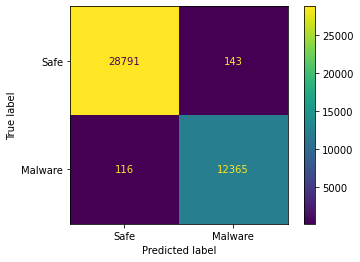

In [32]:
cm = confusion_matrix(y_test,y_pred)
classes = ['Safe', 'Malware']

cmd = ConfusionMatrixDisplay(cm, display_labels=classes)
cmd.plot()
plt.show()

the accuracy of Decision Tree is 99.08004346251357 and Random Forest is 98.31220572256429


,Agorithms,accuracy
0,Decision Tree,99.080043
1,Random Forest,98.312206
2,Extreme Random Tree,99.374623


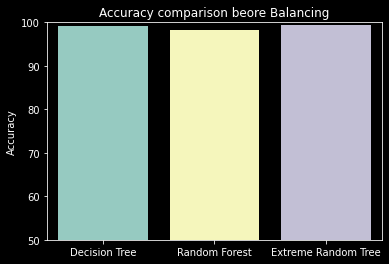

In [33]:
import numpy as np
import seaborn as sns
import matplotlib as pl

pl.style.use('dark_background')
x=['Decision Tree','Random Forest','Extreme Random Tree']
 
ax=sns.barplot(x,ac)
ax.set_title('Accuracy comparison beore Balancing')
ax.set_ylabel('Accuracy')
#ax.yaxis.set_major_locator(ticker.LinearLocator())
print("the accuracy of {} is {} and {} is {}".format(x[0],ac[0],x[1],ac[1]))
ax.set_ylim(50,100)
import pandas as pd
data={'Agorithms':x,
     "accuracy":ac}
df=pd.DataFrame(data)
df.head()

In [34]:
counter = Counter(y_train)
print('Before', counter)

Before Counter({0: 67790, 1: 28842})


In [35]:
#applying smote to convert imbalanced daraset to balanced one then again performing classification to avoid underfitting
ac=[]
smt = SMOTE()
X_train_sm, y_train_sm = smt.fit_resample(X_train, y_train)

counter = Counter(y_train_sm)
print('After', counter)

After Counter({0: 67790, 1: 67790})


In [36]:
from sklearn import tree
model=tree.DecisionTreeClassifier()
model.fit(X_train_sm, y_train_sm)
y_pred = model.predict(X_test)
ac.append(accuracy_score(y_pred,y_test)*100)
accuracy_score(y_pred,y_test)

0.9902692261257998

In [37]:
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier(max_depth=2, random_state=0)
model.fit(X_train_sm, y_train_sm)
y_pred = model.predict(X_test)
ac.append(accuracy_score(y_pred,y_test)*100)
accuracy_score(y_pred,y_test)

0.9827840154533382

In [38]:
from sklearn.ensemble import ExtraTreesClassifier
model = ExtraTreesClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
ac.append(accuracy_score(y_pred,y_test)*100)
accuracy_score(y_pred,y_test)

0.9937462272123627

In [39]:
cm = confusion_matrix(y_test,y_pred)


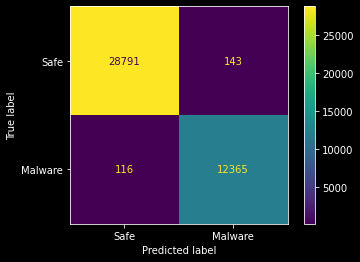

In [40]:
classes = ['Safe', 'Malware']

cmd = ConfusionMatrixDisplay(cm, display_labels=classes)
cmd.plot()
plt.show()

the accuracy of Decision Tree is 99.02692261257998 and Random Forest is 98.27840154533382


,Agorithms,accuracy
0,Decision Tree,99.026923
1,Random Forest,98.278402
2,Extreme Random Tree,99.374623


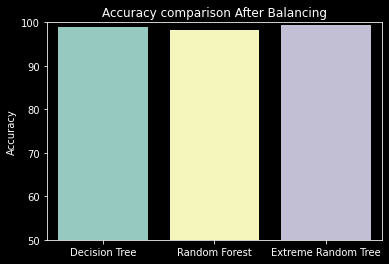

In [41]:
import numpy as np
import seaborn as sns
import matplotlib as plt

plt.style.use('dark_background')
x=['Decision Tree','Random Forest','Extreme Random Tree']
 
ax=sns.barplot(x,ac)
ax.set_title('Accuracy comparison After Balancing')
ax.set_ylabel('Accuracy')
#ax.yaxis.set_major_locator(ticker.LinearLocator())
print("the accuracy of {} is {} and {} is {}".format(x[0],ac[0],x[1],ac[1]))
ax.set_ylim(50,100)
import pandas as pd
data={'Agorithms':x,
     "accuracy":ac}
df=pd.DataFrame(data)
df.head()

In [42]:
y_pred

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [43]:
#test data prediction if prediction is 1 -ransome ware ,0--normal
for i in y_pred:
    if i==1:
        print("Ransome attack")
    else:
        print("No attack")

No attack
No attack
No attack
No attack
No attack
No attack
Ransome attack
Ransome attack
No attack
No attack
No attack
No attack
No attack
No attack
No attack
No attack
No attack
Ransome attack
Ransome attack
No attack
No attack
No attack
No attack
No attack
Ransome attack
No attack
Ransome attack
No attack
Ransome attack
Ransome attack
Ransome attack
Ransome attack
Ransome attack
No attack
No attack
Ransome attack
Ransome attack
No attack
Ransome attack
Ransome attack
No attack
No attack
No attack
No attack
Ransome attack
Ransome attack
No attack
No attack
No attack
No attack
No attack
No attack
No attack
Ransome attack
No attack
Ransome attack
No attack
No attack
No attack
Ransome attack
No attack
No attack
No attack
No attack
No attack
Ransome attack
No attack
No attack
No attack
No attack
Ransome attack
No attack
No attack
No attack
Ransome attack
Ransome attack
Ransome attack
Ransome attack
Ransome attack
No attack
No attack
No attack
Ransome attack
No attack
No attack
No attack


No attack
Ransome attack
Ransome attack
No attack
No attack
No attack
Ransome attack
Ransome attack
No attack
No attack
Ransome attack
No attack
No attack
Ransome attack
Ransome attack
No attack
No attack
Ransome attack
Ransome attack
No attack
No attack
Ransome attack
Ransome attack
Ransome attack
No attack
Ransome attack
Ransome attack
Ransome attack
No attack
No attack
Ransome attack
No attack
No attack
Ransome attack
No attack
Ransome attack
Ransome attack
No attack
No attack
No attack
No attack
No attack
No attack
No attack
No attack
No attack
No attack
No attack
Ransome attack
No attack
No attack
No attack
Ransome attack
No attack
No attack
No attack
Ransome attack
No attack
Ransome attack
Ransome attack
No attack
No attack
No attack
No attack
No attack
No attack
No attack
No attack
No attack
Ransome attack
No attack
No attack
Ransome attack
Ransome attack
No attack
No attack
No attack
No attack
No attack
No attack
Ransome attack
Ransome attack
Ransome attack
No attack
No attack


No attack
No attack
No attack
No attack
No attack
No attack
No attack
No attack
No attack
No attack
No attack
Ransome attack
No attack
No attack
Ransome attack
Ransome attack
Ransome attack
No attack
Ransome attack
No attack
No attack
No attack
No attack
No attack
No attack
No attack
Ransome attack
No attack
No attack
Ransome attack
No attack
Ransome attack
Ransome attack
No attack
Ransome attack
Ransome attack
No attack
No attack
No attack
No attack
No attack
Ransome attack
Ransome attack
Ransome attack
No attack
No attack
Ransome attack
No attack
No attack
Ransome attack
Ransome attack
No attack
Ransome attack
No attack
No attack
No attack
No attack
No attack
No attack
No attack
No attack
Ransome attack
No attack
Ransome attack
No attack
Ransome attack
Ransome attack
No attack
No attack
No attack
No attack
No attack
No attack
No attack
No attack
Ransome attack
No attack
No attack
Ransome attack
No attack
No attack
No attack
No attack
No attack
No attack
No attack
No attack
Ransome at

No attack
No attack
No attack
No attack
No attack
No attack
No attack
Ransome attack
No attack
No attack
Ransome attack
No attack
No attack
No attack
No attack
No attack
No attack
No attack
No attack
Ransome attack
No attack
No attack
No attack
Ransome attack
Ransome attack
No attack
Ransome attack
No attack
No attack
Ransome attack
No attack
No attack
No attack
No attack
No attack
Ransome attack
Ransome attack
No attack
No attack
No attack
No attack
No attack
No attack
No attack
No attack
Ransome attack
No attack
Ransome attack
No attack
No attack
Ransome attack
Ransome attack
Ransome attack
Ransome attack
No attack
No attack
Ransome attack
No attack
No attack
No attack
No attack
Ransome attack
No attack
No attack
No attack
No attack
Ransome attack
No attack
No attack
No attack
No attack
No attack
No attack
No attack
Ransome attack
No attack
No attack
Ransome attack
No attack
Ransome attack
No attack
Ransome attack
No attack
No attack
No attack
No attack
No attack
No attack
No attack


Ransome attack
Ransome attack
No attack
No attack
Ransome attack
No attack
No attack
No attack
Ransome attack
No attack
No attack
No attack
Ransome attack
No attack
No attack
Ransome attack
No attack
Ransome attack
No attack
No attack
No attack
No attack
No attack
No attack
No attack
No attack
No attack
No attack
No attack
Ransome attack
No attack
No attack
No attack
No attack
No attack
Ransome attack
No attack
No attack
No attack
Ransome attack
Ransome attack
No attack
Ransome attack
No attack
No attack
No attack
Ransome attack
Ransome attack
No attack
No attack
No attack
No attack
No attack
Ransome attack
No attack
No attack
No attack
No attack
Ransome attack
No attack
No attack
No attack
Ransome attack
Ransome attack
No attack
No attack
No attack
No attack
Ransome attack
No attack
No attack
Ransome attack
No attack
No attack
Ransome attack
No attack
No attack
No attack
Ransome attack
Ransome attack
Ransome attack
No attack
No attack
Ransome attack
Ransome attack
No attack
No attack


No attack
No attack
No attack
Ransome attack
No attack
No attack
No attack
No attack
No attack
No attack
Ransome attack
No attack
No attack
No attack
No attack
No attack
No attack
Ransome attack
No attack
No attack
Ransome attack
No attack
Ransome attack
Ransome attack
No attack
No attack
No attack
No attack
Ransome attack
Ransome attack
Ransome attack
No attack
No attack
No attack
No attack
Ransome attack
No attack
No attack
Ransome attack
No attack
Ransome attack
No attack
No attack
No attack
Ransome attack
No attack
No attack
No attack
No attack
No attack
No attack
Ransome attack
No attack
No attack
Ransome attack
Ransome attack
No attack
No attack
No attack
No attack
No attack
No attack
No attack
No attack
Ransome attack
No attack
No attack
No attack
No attack
No attack
No attack
No attack
Ransome attack
Ransome attack
Ransome attack
Ransome attack
Ransome attack
No attack
No attack
No attack
No attack
Ransome attack
No attack
No attack
No attack
No attack
No attack
Ransome attack


No attack
No attack
No attack
No attack
No attack
No attack
No attack
No attack
No attack
No attack
No attack
No attack
No attack
Ransome attack
No attack
No attack
No attack
Ransome attack
No attack
Ransome attack
Ransome attack
No attack
No attack
No attack
Ransome attack
No attack
Ransome attack
No attack
No attack
No attack
Ransome attack
No attack
No attack
No attack
No attack
No attack
No attack
Ransome attack
Ransome attack
Ransome attack
No attack
Ransome attack
No attack
Ransome attack
No attack
Ransome attack
No attack
No attack
Ransome attack
No attack
No attack
No attack
No attack
Ransome attack
No attack
Ransome attack
No attack
Ransome attack
No attack
Ransome attack
Ransome attack
No attack
No attack
No attack
No attack
Ransome attack
No attack
Ransome attack
No attack
No attack
No attack
No attack
Ransome attack
No attack
No attack
No attack
No attack
No attack
No attack
Ransome attack
No attack
Ransome attack
No attack
No attack
Ransome attack
Ransome attack
Ransome at

No attack
No attack
No attack
Ransome attack
Ransome attack
Ransome attack
Ransome attack
No attack
No attack
Ransome attack
Ransome attack
No attack
No attack
No attack
No attack
No attack
No attack
No attack
Ransome attack
Ransome attack
No attack
No attack
No attack
No attack
No attack
No attack
No attack
No attack
No attack
No attack
No attack
Ransome attack
No attack
No attack
No attack
No attack
Ransome attack
No attack
No attack
No attack
Ransome attack
No attack
Ransome attack
No attack
No attack
No attack
No attack
No attack
No attack
Ransome attack
No attack
Ransome attack
No attack
No attack
No attack
Ransome attack
No attack
Ransome attack
Ransome attack
Ransome attack
No attack
No attack
No attack
No attack
No attack
No attack
No attack
No attack
No attack
Ransome attack
Ransome attack
No attack
No attack
Ransome attack
No attack
Ransome attack
No attack
No attack
No attack
No attack
No attack
No attack
No attack
No attack
No attack
No attack
Ransome attack
No attack
No at

No attack
Ransome attack
Ransome attack
No attack
No attack
No attack
Ransome attack
No attack
No attack
Ransome attack
Ransome attack
No attack
No attack
No attack
Ransome attack
No attack
Ransome attack
Ransome attack
Ransome attack
Ransome attack
No attack
No attack
No attack
No attack
Ransome attack
No attack
No attack
No attack
Ransome attack
No attack
No attack
No attack
No attack
No attack
No attack
No attack
No attack
No attack
No attack
Ransome attack
No attack
Ransome attack
Ransome attack
No attack
Ransome attack
No attack
No attack
Ransome attack
No attack
No attack
No attack
No attack
Ransome attack
No attack
No attack
Ransome attack
No attack
Ransome attack
No attack
Ransome attack
No attack
No attack
Ransome attack
No attack
Ransome attack
Ransome attack
No attack
No attack
No attack
No attack
No attack
Ransome attack
No attack
No attack
No attack
Ransome attack
Ransome attack
Ransome attack
Ransome attack
No attack
Ransome attack
No attack
No attack
No attack
No attack


Ransome attack
No attack
No attack
No attack
Ransome attack
Ransome attack
Ransome attack
Ransome attack
Ransome attack
No attack
No attack
No attack
No attack
No attack
No attack
No attack
No attack
No attack
No attack
Ransome attack
No attack
No attack
Ransome attack
Ransome attack
No attack
No attack
No attack
No attack
Ransome attack
No attack
No attack
Ransome attack
No attack
No attack
No attack
No attack
No attack
Ransome attack
No attack
Ransome attack
Ransome attack
Ransome attack
No attack
No attack
No attack
No attack
No attack
No attack
No attack
No attack
No attack
No attack
No attack
Ransome attack
Ransome attack
No attack
No attack
No attack
Ransome attack
No attack
No attack
No attack
Ransome attack
Ransome attack
No attack
No attack
No attack
Ransome attack
No attack
No attack
No attack
No attack
No attack
No attack
No attack
Ransome attack
Ransome attack
No attack
No attack
Ransome attack
No attack
No attack
No attack
Ransome attack
No attack
No attack
No attack
Ranso

No attack
No attack
No attack
No attack
No attack
No attack
No attack
No attack
No attack
No attack
Ransome attack
No attack
Ransome attack
No attack
Ransome attack
No attack
Ransome attack
Ransome attack
No attack
No attack
No attack
No attack
No attack
No attack
No attack
Ransome attack
No attack
No attack
No attack
No attack
Ransome attack
Ransome attack
No attack
Ransome attack
No attack
Ransome attack
No attack
No attack
No attack
Ransome attack
Ransome attack
No attack
No attack
No attack
Ransome attack
No attack
No attack
No attack
No attack
No attack
Ransome attack
Ransome attack
Ransome attack
No attack
Ransome attack
Ransome attack
No attack
No attack
No attack
No attack
No attack
Ransome attack
Ransome attack
No attack
No attack
No attack
Ransome attack
No attack
Ransome attack
No attack
No attack
Ransome attack
No attack
Ransome attack
No attack
No attack
No attack
No attack
No attack
Ransome attack
No attack
Ransome attack
No attack
No attack
Ransome attack
Ransome attack


No attack
No attack
No attack
No attack
No attack
No attack
No attack
No attack
No attack
No attack
No attack
No attack
Ransome attack
No attack
No attack
No attack
No attack
No attack
No attack
Ransome attack
No attack
No attack
Ransome attack
Ransome attack
Ransome attack
No attack
No attack
No attack
Ransome attack
No attack
Ransome attack
No attack
Ransome attack
No attack
No attack
No attack
No attack
No attack
No attack
No attack
Ransome attack
Ransome attack
No attack
Ransome attack
Ransome attack
Ransome attack
No attack
No attack
Ransome attack
No attack
No attack
Ransome attack
No attack
No attack
Ransome attack
No attack
No attack
Ransome attack
No attack
No attack
No attack
No attack
No attack
No attack
No attack
No attack
No attack
Ransome attack
No attack
No attack
Ransome attack
Ransome attack
No attack
No attack
No attack
Ransome attack
Ransome attack
No attack
Ransome attack
Ransome attack
No attack
No attack
Ransome attack
No attack
No attack
No attack
No attack
No at

No attack
Ransome attack
Ransome attack
Ransome attack
No attack
No attack
Ransome attack
Ransome attack
Ransome attack
No attack
No attack
No attack
No attack
Ransome attack
Ransome attack
Ransome attack
Ransome attack
No attack
No attack
No attack
Ransome attack
No attack
No attack
Ransome attack
Ransome attack
No attack
No attack
Ransome attack
No attack
No attack
No attack
Ransome attack
Ransome attack
Ransome attack
Ransome attack
Ransome attack
Ransome attack
No attack
No attack
No attack
No attack
No attack
No attack
Ransome attack
No attack
Ransome attack
No attack
No attack
No attack
Ransome attack
No attack
No attack
No attack
No attack
No attack
No attack
No attack
No attack
No attack
No attack
No attack
No attack
Ransome attack
No attack
Ransome attack
No attack
No attack
Ransome attack
Ransome attack
No attack
No attack
No attack
No attack
No attack
Ransome attack
Ransome attack
No attack
Ransome attack
Ransome attack
Ransome attack
No attack
No attack
No attack
No attack


No attack
No attack
No attack
No attack
Ransome attack
No attack
No attack
Ransome attack
No attack
Ransome attack
No attack
No attack
No attack
Ransome attack
No attack
No attack
Ransome attack
No attack
No attack
No attack
Ransome attack
No attack
No attack
Ransome attack
No attack
No attack
No attack
Ransome attack
No attack
Ransome attack
No attack
No attack
No attack
No attack
Ransome attack
Ransome attack
Ransome attack
No attack
No attack
No attack
No attack
No attack
No attack
No attack
No attack
No attack
No attack
No attack
No attack
Ransome attack
No attack
No attack
Ransome attack
No attack
No attack
No attack
No attack
No attack
No attack
No attack
No attack
Ransome attack
No attack
No attack
No attack
No attack
No attack
Ransome attack
Ransome attack
No attack
Ransome attack
No attack
No attack
No attack
No attack
No attack
Ransome attack
No attack
No attack
No attack
No attack
No attack
No attack
No attack
Ransome attack
No attack
Ransome attack
No attack
No attack
Ranso

No attack
No attack
Ransome attack
No attack
No attack
Ransome attack
No attack
No attack
Ransome attack
No attack
Ransome attack
Ransome attack
No attack
No attack
No attack
No attack
No attack
Ransome attack
No attack
No attack
No attack
No attack
No attack
Ransome attack
No attack
No attack
Ransome attack
No attack
No attack
Ransome attack
No attack
Ransome attack
Ransome attack
No attack
No attack
No attack
No attack
No attack
Ransome attack
Ransome attack
Ransome attack
No attack
Ransome attack
No attack
No attack
No attack
No attack
No attack
No attack
Ransome attack
No attack
No attack
No attack
Ransome attack
No attack
Ransome attack
No attack
No attack
No attack
No attack
Ransome attack
No attack
No attack
No attack
No attack
No attack
Ransome attack
No attack
No attack
No attack
No attack
No attack
No attack
No attack
No attack
No attack
No attack
No attack
Ransome attack
No attack
No attack
No attack
Ransome attack
No attack
No attack
No attack
No attack
No attack
No attack


No attack
No attack
No attack
No attack
No attack
No attack
No attack
Ransome attack
No attack
No attack
Ransome attack
Ransome attack
No attack
No attack
No attack
No attack
No attack
Ransome attack
Ransome attack
No attack
No attack
Ransome attack
No attack
Ransome attack
No attack
Ransome attack
No attack
No attack
No attack
No attack
Ransome attack
No attack
No attack
No attack
No attack
No attack
Ransome attack
No attack
Ransome attack
No attack
No attack
Ransome attack
No attack
No attack
No attack
No attack
No attack
Ransome attack
No attack
No attack
No attack
No attack
Ransome attack
No attack
No attack
No attack
No attack
Ransome attack
Ransome attack
No attack
Ransome attack
No attack
No attack
Ransome attack
No attack
Ransome attack
No attack
Ransome attack
No attack
No attack
No attack
No attack
No attack
No attack
No attack
Ransome attack
No attack
Ransome attack
Ransome attack
No attack
No attack
No attack
No attack
No attack
Ransome attack
No attack
No attack
Ransome at

No attack
No attack
No attack
No attack
No attack
No attack
No attack
No attack
No attack
No attack
Ransome attack
No attack
No attack
Ransome attack
No attack
No attack
No attack
No attack
No attack
Ransome attack
No attack
No attack
Ransome attack
No attack
No attack
Ransome attack
No attack
Ransome attack
No attack
Ransome attack
No attack
No attack
No attack
No attack
Ransome attack
No attack
No attack
No attack
Ransome attack
No attack
Ransome attack
No attack
No attack
No attack
No attack
No attack
No attack
No attack
Ransome attack
No attack
Ransome attack
No attack
No attack
No attack
No attack
No attack
No attack
No attack
No attack
No attack
No attack
No attack
No attack
No attack
Ransome attack
No attack
No attack
Ransome attack
No attack
No attack
Ransome attack
No attack
No attack
Ransome attack
No attack
No attack
No attack
No attack
No attack
No attack
No attack
No attack
No attack
No attack
No attack
No attack
No attack
Ransome attack
No attack
Ransome attack
No attack


Ransome attack
Ransome attack
No attack
Ransome attack
No attack
Ransome attack
No attack
Ransome attack
Ransome attack
No attack
No attack
No attack
Ransome attack
No attack
Ransome attack
No attack
Ransome attack
No attack
Ransome attack
No attack
Ransome attack
Ransome attack
No attack
No attack
No attack
No attack
No attack
No attack
No attack
No attack
Ransome attack
No attack
Ransome attack
Ransome attack
Ransome attack
No attack
Ransome attack
No attack
Ransome attack
No attack
Ransome attack
No attack
No attack
No attack
No attack
Ransome attack
No attack
No attack
No attack
Ransome attack
No attack
No attack
No attack
No attack
No attack
No attack
No attack
Ransome attack
No attack
No attack
No attack
Ransome attack
No attack
No attack
Ransome attack
No attack
Ransome attack
No attack
No attack
No attack
No attack
No attack
Ransome attack
No attack
No attack
No attack
No attack
No attack
No attack
No attack
No attack
No attack
Ransome attack
Ransome attack
No attack
No attack


No attack
Ransome attack
No attack
Ransome attack
No attack
No attack
Ransome attack
Ransome attack
No attack
Ransome attack
No attack
Ransome attack
Ransome attack
No attack
No attack
No attack
No attack
Ransome attack
No attack
No attack
No attack
Ransome attack
No attack
No attack
Ransome attack
No attack
No attack
No attack
Ransome attack
Ransome attack
Ransome attack
No attack
Ransome attack
Ransome attack
Ransome attack
Ransome attack
No attack
No attack
No attack
Ransome attack
No attack
Ransome attack
No attack
Ransome attack
No attack
No attack
Ransome attack
No attack
Ransome attack
Ransome attack
No attack
No attack
No attack
Ransome attack
Ransome attack
No attack
No attack
No attack
No attack
Ransome attack
Ransome attack
No attack
No attack
No attack
No attack
No attack
No attack
No attack
No attack
No attack
No attack
Ransome attack
Ransome attack
No attack
No attack
No attack
No attack
No attack
Ransome attack
No attack
No attack
Ransome attack
No attack
No attack
No at

No attack
Ransome attack
No attack
No attack
No attack
No attack
No attack
No attack
Ransome attack
No attack
Ransome attack
No attack
Ransome attack
No attack
No attack
No attack
No attack
No attack
Ransome attack
No attack
No attack
Ransome attack
No attack
No attack
Ransome attack
No attack
No attack
Ransome attack
No attack
No attack
Ransome attack
No attack
No attack
No attack
No attack
Ransome attack
No attack
No attack
Ransome attack
No attack
No attack
No attack
Ransome attack
No attack
Ransome attack
Ransome attack
No attack
No attack
No attack
No attack
Ransome attack
Ransome attack
Ransome attack
No attack
No attack
No attack
No attack
No attack
No attack
Ransome attack
No attack
No attack
Ransome attack
No attack
No attack
No attack
Ransome attack
Ransome attack
No attack
No attack
No attack
No attack
Ransome attack
No attack
Ransome attack
Ransome attack
Ransome attack
No attack
No attack
Ransome attack
Ransome attack
Ransome attack
No attack
No attack
No attack
No attack


No attack
No attack
No attack
No attack
No attack
Ransome attack
No attack
No attack
No attack
No attack
Ransome attack
No attack
No attack
No attack
No attack
Ransome attack
Ransome attack
No attack
Ransome attack
Ransome attack
Ransome attack
No attack
Ransome attack
No attack
Ransome attack
Ransome attack
No attack
Ransome attack
Ransome attack
No attack
No attack
Ransome attack
No attack
No attack
No attack
No attack
No attack
No attack
Ransome attack
Ransome attack
No attack
Ransome attack
No attack
No attack
Ransome attack
No attack
No attack
No attack
Ransome attack
No attack
No attack
Ransome attack
Ransome attack
Ransome attack
Ransome attack
No attack
No attack
Ransome attack
Ransome attack
Ransome attack
No attack
No attack
No attack
Ransome attack
Ransome attack
No attack
No attack
No attack
No attack
No attack
Ransome attack
No attack
Ransome attack
Ransome attack
No attack
No attack
No attack
No attack
No attack
No attack
Ransome attack
No attack
Ransome attack
Ransome at

No attack
No attack
No attack
Ransome attack
No attack
No attack
No attack
No attack
No attack
No attack
No attack
No attack
No attack
No attack
Ransome attack
Ransome attack
No attack
No attack
No attack
No attack
Ransome attack
No attack
No attack
No attack
No attack
Ransome attack
No attack
No attack
No attack
No attack
No attack
No attack
No attack
No attack
No attack
No attack
No attack
No attack
No attack
No attack
No attack
No attack
No attack
Ransome attack
Ransome attack
No attack
No attack
Ransome attack
Ransome attack
Ransome attack
No attack
No attack
No attack
No attack
No attack
Ransome attack
No attack
No attack
No attack
No attack
No attack
No attack
No attack
Ransome attack
No attack
No attack
Ransome attack
Ransome attack
No attack
No attack
No attack
No attack
Ransome attack
No attack
No attack
Ransome attack
Ransome attack
No attack
No attack
No attack
No attack
No attack
Ransome attack
No attack
No attack
No attack
No attack
No attack
Ransome attack
Ransome attack


Ransome attack
No attack
Ransome attack
Ransome attack
No attack
No attack
No attack
Ransome attack
Ransome attack
No attack
No attack
No attack
No attack
No attack
No attack
Ransome attack
No attack
No attack
No attack
Ransome attack
No attack
No attack
No attack
Ransome attack
No attack
Ransome attack
No attack
No attack
No attack
No attack
Ransome attack
Ransome attack
No attack
No attack
No attack
No attack
No attack
No attack
Ransome attack
Ransome attack
Ransome attack
No attack
No attack
Ransome attack
No attack
No attack
No attack
No attack
No attack
No attack
Ransome attack
No attack
No attack
No attack
Ransome attack
No attack
Ransome attack
No attack
No attack
No attack
Ransome attack
Ransome attack
Ransome attack
No attack
No attack
No attack
No attack
No attack
No attack
No attack
Ransome attack
No attack
No attack
No attack
No attack
No attack
Ransome attack
No attack
No attack
Ransome attack
No attack
No attack
Ransome attack
No attack
No attack
No attack
No attack
No at

No attack
No attack
No attack
No attack
No attack
Ransome attack
No attack
No attack
Ransome attack
No attack
No attack
Ransome attack
No attack
No attack
Ransome attack
No attack
No attack
No attack
No attack
No attack
No attack
No attack
Ransome attack
No attack
Ransome attack
Ransome attack
Ransome attack
No attack
Ransome attack
Ransome attack
No attack
No attack
No attack
Ransome attack
No attack
Ransome attack
Ransome attack
No attack
No attack
No attack
No attack
No attack
No attack
No attack
No attack
No attack
No attack
Ransome attack
Ransome attack
No attack
Ransome attack
Ransome attack
No attack
No attack
No attack
No attack
Ransome attack
No attack
No attack
No attack
No attack
Ransome attack
No attack
No attack
No attack
Ransome attack
No attack
Ransome attack
No attack
No attack
No attack
Ransome attack
No attack
Ransome attack
No attack
No attack
No attack
No attack
No attack
No attack
No attack
Ransome attack
No attack
No attack
No attack
No attack
No attack
Ransome at

No attack
No attack
Ransome attack
Ransome attack
No attack
No attack
No attack
Ransome attack
Ransome attack
No attack
No attack
Ransome attack
No attack
Ransome attack
Ransome attack
Ransome attack
No attack
Ransome attack
Ransome attack
No attack
No attack
No attack
No attack
No attack
No attack
Ransome attack
Ransome attack
No attack
Ransome attack
No attack
Ransome attack
No attack
No attack
No attack
No attack
No attack
No attack
Ransome attack
No attack
Ransome attack
No attack
No attack
Ransome attack
No attack
Ransome attack
No attack
No attack
No attack
Ransome attack
No attack
No attack
No attack
No attack
Ransome attack
No attack
No attack
No attack
No attack
Ransome attack
Ransome attack
No attack
No attack
No attack
Ransome attack
No attack
No attack
No attack
No attack
No attack
No attack
Ransome attack
Ransome attack
No attack
No attack
Ransome attack
No attack
No attack
No attack
No attack
No attack
No attack
No attack
No attack
No attack
No attack
Ransome attack
Ranso

No attack
No attack
No attack
Ransome attack
Ransome attack
No attack
No attack
No attack
Ransome attack
No attack
Ransome attack
No attack
No attack
No attack
No attack
Ransome attack
Ransome attack
No attack
No attack
No attack
Ransome attack
No attack
Ransome attack
No attack
Ransome attack
No attack
Ransome attack
No attack
No attack
No attack
No attack
No attack
Ransome attack
Ransome attack
No attack
No attack
Ransome attack
Ransome attack
No attack
Ransome attack
No attack
No attack
No attack
No attack
No attack
Ransome attack
Ransome attack
No attack
No attack
No attack
Ransome attack
Ransome attack
No attack
Ransome attack
Ransome attack
Ransome attack
No attack
No attack
No attack
No attack
Ransome attack
Ransome attack
No attack
No attack
No attack
No attack
Ransome attack
No attack
No attack
Ransome attack
Ransome attack
Ransome attack
Ransome attack
Ransome attack
Ransome attack
Ransome attack
No attack
No attack
No attack
No attack
Ransome attack
No attack
No attack
No at

No attack
Ransome attack
No attack
No attack
Ransome attack
No attack
Ransome attack
Ransome attack
Ransome attack
No attack
No attack
Ransome attack
Ransome attack
No attack
No attack
No attack
No attack
No attack
Ransome attack
Ransome attack
Ransome attack
No attack
Ransome attack
Ransome attack
Ransome attack
No attack
No attack
Ransome attack
No attack
No attack
No attack
No attack
Ransome attack
Ransome attack
Ransome attack
Ransome attack
No attack
No attack
Ransome attack
No attack
Ransome attack
No attack
No attack
No attack
Ransome attack
No attack
No attack
No attack
No attack
Ransome attack
Ransome attack
No attack
Ransome attack
Ransome attack
Ransome attack
No attack
Ransome attack
No attack
No attack
Ransome attack
Ransome attack
No attack
Ransome attack
No attack
Ransome attack
Ransome attack
Ransome attack
No attack
No attack
No attack
Ransome attack
No attack
Ransome attack
No attack
Ransome attack
No attack
No attack
No attack
No attack
No attack
No attack
No attack


No attack
No attack
No attack
No attack
No attack
No attack
Ransome attack
No attack
Ransome attack
Ransome attack
No attack
No attack
No attack
Ransome attack
No attack
No attack
Ransome attack
Ransome attack
No attack
Ransome attack
No attack
No attack
No attack
Ransome attack
No attack
No attack
No attack
No attack
Ransome attack
No attack
No attack
No attack
No attack
No attack
Ransome attack
Ransome attack
Ransome attack
No attack
No attack
No attack
No attack
No attack
Ransome attack
Ransome attack
Ransome attack
No attack
No attack
No attack
Ransome attack
No attack
Ransome attack
No attack
No attack
No attack
Ransome attack
No attack
No attack
No attack
No attack
Ransome attack
No attack
No attack
Ransome attack
No attack
Ransome attack
Ransome attack
Ransome attack
No attack
No attack
No attack
No attack
No attack
Ransome attack
No attack
No attack
Ransome attack
No attack
No attack
Ransome attack
No attack
No attack
No attack
No attack
No attack
Ransome attack
No attack
No at

No attack
No attack
No attack
No attack
Ransome attack
No attack
No attack
No attack
No attack
Ransome attack
No attack
Ransome attack
No attack
No attack
No attack
No attack
Ransome attack
Ransome attack
No attack
Ransome attack
No attack
No attack
No attack
No attack
No attack
Ransome attack
No attack
Ransome attack
Ransome attack
No attack
No attack
Ransome attack
Ransome attack
No attack
Ransome attack
No attack
No attack
No attack
No attack
No attack
No attack
No attack
No attack
No attack
No attack
No attack
No attack
No attack
No attack
No attack
No attack
Ransome attack
No attack
No attack
Ransome attack
Ransome attack
Ransome attack
Ransome attack
No attack
Ransome attack
No attack
No attack
No attack
Ransome attack
No attack
Ransome attack
No attack
No attack
Ransome attack
No attack
No attack
No attack
No attack
No attack
Ransome attack
No attack
Ransome attack
Ransome attack
No attack
No attack
No attack
No attack
No attack
Ransome attack
No attack
No attack
No attack
No at

No attack
No attack
Ransome attack
No attack
No attack
Ransome attack
No attack
No attack
No attack
No attack
No attack
No attack
No attack
No attack
Ransome attack
Ransome attack
No attack
No attack
No attack
No attack
No attack
No attack
No attack
No attack
Ransome attack
No attack
No attack
No attack
No attack
Ransome attack
No attack
Ransome attack
No attack
Ransome attack
Ransome attack
Ransome attack
No attack
No attack
No attack
Ransome attack
Ransome attack
No attack
No attack
No attack
Ransome attack
No attack
No attack
No attack
No attack
No attack
No attack
No attack
No attack
No attack
Ransome attack
Ransome attack
Ransome attack
Ransome attack
No attack
Ransome attack
Ransome attack
Ransome attack
No attack
No attack
No attack
No attack
Ransome attack
No attack
No attack
No attack
No attack
No attack
No attack
No attack
No attack
No attack
No attack
No attack
Ransome attack
No attack
No attack
No attack
No attack
No attack
No attack
No attack
Ransome attack
No attack
Ranso

No attack
Ransome attack
No attack
No attack
No attack
Ransome attack
No attack
Ransome attack
No attack
Ransome attack
No attack
Ransome attack
No attack
No attack
Ransome attack
Ransome attack
No attack
No attack
No attack
Ransome attack
Ransome attack
No attack
No attack
No attack
No attack
No attack
Ransome attack
Ransome attack
No attack
No attack
No attack
No attack
Ransome attack
Ransome attack
Ransome attack
No attack
No attack
Ransome attack
No attack
Ransome attack
No attack
No attack
Ransome attack
No attack
No attack
Ransome attack
No attack
No attack
No attack
Ransome attack
No attack
Ransome attack
No attack
Ransome attack
Ransome attack
Ransome attack
No attack
No attack
No attack
No attack
No attack
No attack
No attack
Ransome attack
No attack
No attack
Ransome attack
No attack
No attack
No attack
Ransome attack
No attack
No attack
No attack
No attack
No attack
Ransome attack
No attack
No attack
Ransome attack
No attack
No attack
No attack
No attack
Ransome attack
Ranso

No attack
No attack
Ransome attack
No attack
No attack
No attack
Ransome attack
No attack
No attack
No attack
No attack
Ransome attack
No attack
Ransome attack
Ransome attack
Ransome attack
No attack
Ransome attack
No attack
Ransome attack
Ransome attack
No attack
No attack
No attack
Ransome attack
No attack
No attack
No attack
No attack
No attack
No attack
Ransome attack
No attack
No attack
No attack
Ransome attack
Ransome attack
No attack
Ransome attack
No attack
No attack
Ransome attack
No attack
No attack
Ransome attack
No attack
Ransome attack
No attack
No attack
No attack
No attack
No attack
No attack
No attack
No attack
No attack
No attack
No attack
Ransome attack
No attack
No attack
No attack
No attack
No attack
Ransome attack
No attack
Ransome attack
No attack
Ransome attack
No attack
Ransome attack
No attack
No attack
Ransome attack
No attack
Ransome attack
No attack
No attack
No attack
No attack
No attack
No attack
Ransome attack
No attack
No attack
No attack
Ransome attack


No attack
No attack
No attack
No attack
No attack
No attack
No attack
No attack
No attack
No attack
No attack
Ransome attack
No attack
Ransome attack
No attack
No attack
No attack
No attack
No attack
No attack
No attack
No attack
Ransome attack
No attack
No attack
No attack
No attack
Ransome attack
Ransome attack
No attack
No attack
Ransome attack
No attack
Ransome attack
No attack
No attack
Ransome attack
No attack
No attack
Ransome attack
Ransome attack
No attack
No attack
Ransome attack
No attack
No attack
No attack
No attack
No attack
No attack
No attack
No attack
No attack
Ransome attack
No attack
No attack
Ransome attack
No attack
No attack
No attack
Ransome attack
Ransome attack
Ransome attack
Ransome attack
No attack
Ransome attack
Ransome attack
Ransome attack
Ransome attack
No attack
Ransome attack
No attack
No attack
No attack
No attack
No attack
No attack
Ransome attack
No attack
Ransome attack
No attack
Ransome attack
No attack
No attack
Ransome attack
No attack
Ransome at

No attack
No attack
Ransome attack
Ransome attack
No attack
Ransome attack
No attack
No attack
Ransome attack
Ransome attack
Ransome attack
No attack
No attack
No attack
Ransome attack
No attack
No attack
No attack
No attack
No attack
No attack
No attack
No attack
No attack
Ransome attack
Ransome attack
Ransome attack
No attack
No attack
No attack
Ransome attack
No attack
Ransome attack
No attack
No attack
No attack
No attack
No attack
No attack
No attack
No attack
No attack
Ransome attack
No attack
No attack
No attack
Ransome attack
No attack
Ransome attack
No attack
Ransome attack
No attack
Ransome attack
No attack
No attack
Ransome attack
Ransome attack
No attack
Ransome attack
No attack
No attack
No attack
Ransome attack
No attack
No attack
No attack
No attack
No attack
No attack
No attack
No attack
No attack
No attack
No attack
No attack
Ransome attack
No attack
No attack
Ransome attack
No attack
Ransome attack
No attack
No attack
Ransome attack
Ransome attack
No attack
No attack


No attack
Ransome attack
No attack
Ransome attack
No attack
Ransome attack
No attack
No attack
No attack
No attack
No attack
No attack
No attack
No attack
No attack
Ransome attack
Ransome attack
No attack
No attack
No attack
No attack
No attack
No attack
No attack
No attack
No attack
No attack
No attack
No attack
Ransome attack
No attack
No attack
No attack
No attack
Ransome attack
No attack
No attack
Ransome attack
No attack
No attack
Ransome attack
No attack
Ransome attack
No attack
No attack
Ransome attack
Ransome attack
No attack
Ransome attack
Ransome attack
Ransome attack
No attack
No attack
No attack
No attack
Ransome attack
No attack
Ransome attack
Ransome attack
Ransome attack
No attack
No attack
No attack
No attack
No attack
No attack
No attack
No attack
No attack
No attack
No attack
No attack
No attack
No attack
Ransome attack
Ransome attack
No attack
No attack
No attack
Ransome attack
Ransome attack
No attack
No attack
No attack
No attack
Ransome attack
No attack
No attack


No attack
No attack
Ransome attack
No attack
Ransome attack
No attack
Ransome attack
Ransome attack
Ransome attack
No attack
No attack
Ransome attack
No attack
Ransome attack
Ransome attack
No attack
No attack
No attack
No attack
No attack
No attack
Ransome attack
No attack
No attack
No attack
No attack
No attack
No attack
No attack
Ransome attack
No attack
Ransome attack
No attack
Ransome attack
No attack
Ransome attack
No attack
No attack
No attack
No attack
No attack
No attack
No attack
No attack
Ransome attack
No attack
Ransome attack
No attack
No attack
No attack
No attack
No attack
Ransome attack
No attack
Ransome attack
No attack
No attack
No attack
Ransome attack
No attack
Ransome attack
Ransome attack
No attack
No attack
No attack
No attack
No attack
No attack
Ransome attack
No attack
No attack
Ransome attack
Ransome attack
No attack
No attack
Ransome attack
No attack
Ransome attack
Ransome attack
Ransome attack
No attack
Ransome attack
No attack
No attack
No attack
Ransome at

No attack
Ransome attack
No attack
Ransome attack
No attack
No attack
Ransome attack
No attack
No attack
Ransome attack
Ransome attack
No attack
No attack
No attack
Ransome attack
No attack
No attack
Ransome attack
Ransome attack
Ransome attack
Ransome attack
Ransome attack
Ransome attack
No attack
Ransome attack
Ransome attack
Ransome attack
Ransome attack
No attack
No attack
No attack
No attack
No attack
No attack
No attack
Ransome attack
No attack
No attack
Ransome attack
No attack
No attack
No attack
No attack
No attack
No attack
Ransome attack
No attack
No attack
No attack
Ransome attack
No attack
No attack
No attack
Ransome attack
No attack
No attack
No attack
Ransome attack
No attack
No attack
No attack
No attack
No attack
No attack
Ransome attack
Ransome attack
Ransome attack
No attack
Ransome attack
No attack
No attack
No attack
Ransome attack
Ransome attack
No attack
No attack
No attack
Ransome attack
No attack
Ransome attack
No attack
No attack
No attack
No attack
No attack


No attack
Ransome attack
No attack
No attack
No attack
No attack
Ransome attack
No attack
Ransome attack
Ransome attack
No attack
Ransome attack
Ransome attack
Ransome attack
Ransome attack
No attack
Ransome attack
No attack
No attack
No attack
No attack
Ransome attack
Ransome attack
No attack
No attack
No attack
No attack
No attack
Ransome attack
No attack
No attack
Ransome attack
Ransome attack
No attack
No attack
No attack
No attack
Ransome attack
Ransome attack
Ransome attack
No attack
No attack
No attack
No attack
No attack
Ransome attack
No attack
No attack
No attack
No attack
No attack
Ransome attack
No attack
No attack
No attack
No attack
No attack
No attack
No attack
No attack
No attack
No attack
No attack
Ransome attack
Ransome attack
No attack
Ransome attack
No attack
No attack
No attack
Ransome attack
Ransome attack
No attack
No attack
No attack
No attack
No attack
No attack
No attack
No attack
Ransome attack
Ransome attack
No attack
No attack
No attack
No attack
No attack


No attack
No attack
No attack
Ransome attack
No attack
No attack
No attack
No attack
No attack
Ransome attack
No attack
No attack
No attack
No attack
No attack
No attack
No attack
No attack
No attack
No attack
No attack
Ransome attack
No attack
No attack
No attack
Ransome attack
Ransome attack
Ransome attack
No attack
No attack
No attack
Ransome attack
No attack
No attack
No attack
No attack
No attack
Ransome attack
Ransome attack
Ransome attack
No attack
No attack
No attack
No attack
No attack
No attack
No attack
Ransome attack
No attack
Ransome attack
No attack
Ransome attack
Ransome attack
No attack
Ransome attack
No attack
Ransome attack
Ransome attack
Ransome attack
Ransome attack
No attack
No attack
Ransome attack
Ransome attack
No attack
No attack
Ransome attack
No attack
No attack
Ransome attack
No attack
No attack
No attack
No attack
Ransome attack
No attack
No attack
No attack
Ransome attack
No attack
Ransome attack
No attack
No attack
Ransome attack
No attack
No attack
No at

In [60]:
pred=model.predict([[4194304.0, 23, 7.998828, 4, 48, 1048576, 258, 306688, 4, 6, 2, 2.146071, 12288, 335872]])

In [61]:
pred

array([1], dtype=int64)